## PCA主成分分析

常用的**无监督**降维算法，主要原理为寻找*方差的最大维度，最大化类间样本的方差*


1. **数据标准化：** 使用 Z-score 标准化，将数据的均值调整为0，标准差调整为1。
2. **计算协方差矩阵：** 衡量特征之间的线性关系。
3. **计算特征值和特征向量：** 提取协方差矩阵的特征值和特征向量。
4. **选择主成分：** 根据特征值大小，选择前几个主成分。
5. **构建投影矩阵：** 取出对应的特征向量，形成投影矩阵。
6. **投影数据：** 将数据投影到新的低维空间，实现降维。

**举例说明，对于一个 5 个样本， 3 个特征的数据集，是一个 5 * 3 的矩阵**

- 当计算完协方差矩阵之后，是一个 3 * 3 的矩阵
- 对于这个矩阵的特征值和特征向量，可以计算出 3 个特征值，以及对应的 3 个特征向量，每个特征向量是一个 3 * 1 的列向量
- 假设选择其中两个特征值代表的特征向量作为主成分
- 进行原矩阵 5 * 3 维的到 3 * 2 维的投影，得到 5 * 2 的矩阵
- 这样便是一个降维处理

explained variance ratio : [0.92461872 0.05306648 0.01710261 0.00521218]


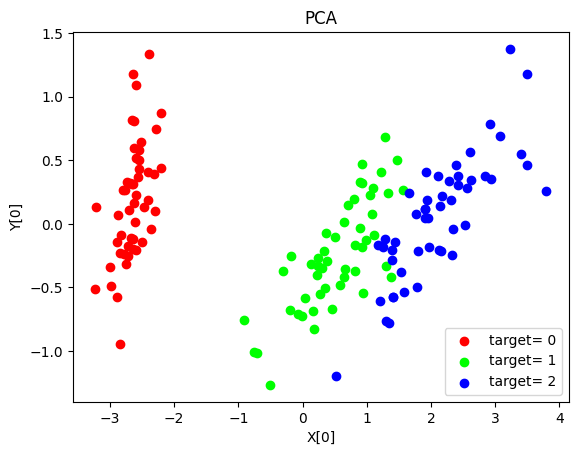

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition


iris = datasets.load_iris()
X, y = iris.data, iris.target


def test_PCA(*data):
    X, y = data
    pca = decomposition.PCA(n_components=None)
    pca.fit(X)
    print("explained variance ratio : %s" % str(pca.explained_variance_ratio_))


def plot_PCA(*data):
    X, y = data
    pca = decomposition.PCA(n_components=2)  # 降维到2维
    pca.fit(X)
    X_r = pca.transform(X)
    ###### 绘制二维数据 ########
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = (
        (1, 0, 0),
        (0, 1, 0),
        (0, 0, 1),
        (0.5, 0.5, 0),
        (0, 0.5, 0.5),
        (0.5, 0, 0.5),
        (0.4, 0.6, 0),
        (0.6, 0.4, 0),
        (0, 0.6, 0.4),
        (0.5, 0.3, 0.2),
    )  # 颜色集合，不同标记的样本染不同的颜色
    for label, color in zip(np.unique(y), colors):
        position = y == label
        ax.scatter(
            X_r[position, 0], X_r[position, 1], label="target= %d" % label, color=color
        )

    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()


test_PCA(X, y)
plot_PCA(X, y)

## LDA线性判别分析

有监督的线性分类器，需要`fit(X, y)`

不仅最大化类间样本的方差，同时最小化类内样本的方差。

假设：
两类数据，分别为类 1 和类 2。它们的中心分别在 $ (2, 3) $ 和 $ (7, 8) $，可以通过 LDA 将二维数据降维到一维。

- 类别 1: $ X_1 = \{(2.5, 3.0), (1.5, 2.5), (2.0, 3.5)\} $
- 类别 2: $ X_2 = \{(7.5, 8.0), (6.5, 7.5), (7.0, 8.5)\} $

1. **计算类内散度矩阵（Within-class Scatter Matrix）**：
    对于每一类 $ i $，计算类内散度矩阵 $ S_i $，表示该类数据点离散程度的度量。然后将所有类的类内散度矩阵加和，得到总的类内散度矩阵 $ S_W $。

    $$
    S_W = \sum_{i=1}^c S_i = \sum_{i=1}^c \sum_{x_k \in C_i} (x_k - \mu_i)(x_k - \mu_i)^T
    $$

    其中，$ c $ 是类别的总数，$ x_k $ 是第 $ k $ 个样本，$ \mu_i $ 是第 $ i $ 类的均值向量。

2. **计算类间散度矩阵（Between-class Scatter Matrix）**：
    计算各类均值与全局均值之间的散布程度，用类间散度矩阵 $ S_B $ 表示。

    $$
    S_B = \sum_{i=1}^c N_i (\mu_i - \mu)(\mu_i - \mu)^T
    $$

    其中，$ N_i $ 是第 $ i $ 类的样本数量，$ \mu $ 是所有样本的整体均值。

3. **求解投影矩阵（Projection Matrix）**：
    通过求解特征值和特征向量，将原始数据投影到新的低维空间。这个过程可以通过**以下优化问题**表示：
    （也就是求式子最大时，$ W $ 为多少）

    $$
    \text{argmax}_W \frac{|W^T S_B W|}{|W^T S_W W|}
    $$

    其中，$ W $ 是投影矩阵。这个优化问题可以通过求解广义特征值问题来实现（可选，还有其他方法）：

    $$
    S_B W = \lambda S_W W
    $$

    取最大的 $ k $ 个特征值对应的特征向量组成投影矩阵 $ W $。

4. **数据投影**：
    最后，使用投影矩阵 $ W $ 将原始数据 $ X $ 映射到低维空间：

    $$
    Y = X W
    $$

    其中，$ Y $ 是降维后的数据。

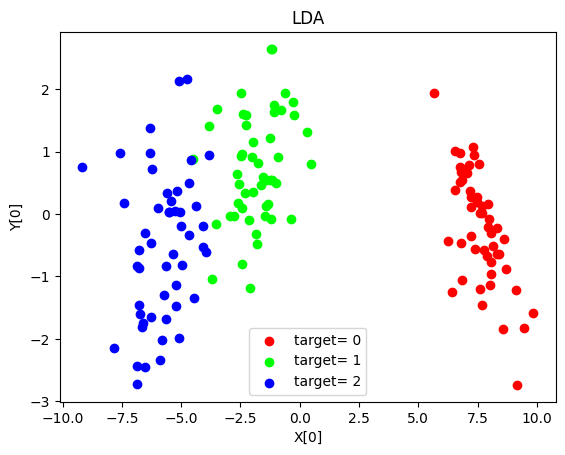

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


iris = datasets.load_iris()
X, y = iris.data, iris.target


def plot_LDA(*data):
    X, y = data
    LDA2 = LDA(n_components=2)
    LDA2.fit(X, y)
    X_r = LDA2.transform(X)  # 原始数据集转换到二维
    ###### 绘制二维数据 ########
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = (
        (1, 0, 0),
        (0, 1, 0),
        (0, 0, 1),
        (0.5, 0.5, 0),
        (0, 0.5, 0.5),
        (0.5, 0, 0.5),
        (0.4, 0.6, 0),
        (0.6, 0.4, 0),
        (0, 0.6, 0.4),
        (0.5, 0.3, 0.2),
    )  # 颜色集合，不同标记的样本染不同的颜色
    for label, color in zip(np.unique(y), colors):
        position = y == label
        ax.scatter(
            X_r[position, 0], X_r[position, 1], label="target= %d" % label, color=color
        )
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("LDA")
    plt.show()


plot_LDA(X, y)

参数`solver`的测评代码

- `svd`：奇异值分解求解最优化，不用计算协方差矩阵，适用于特征参数很大的情形，不能使用`shrinkage`参数收缩
- `lsqr`：最小平方差求解最优化，可以使用`shrinkage`参数收缩
- `eigen`：特征值分解求解最优化，可以使用`shrinkage`参数收缩

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import discriminant_analysis


def test_LinearDiscriminantAnalysis_solver(*data):
    X_train, X_test, y_train, y_test = data
    solvers = ["svd", "lsqr", "eigen"]
    for solver in solvers:
        if solver == "svd":
            lda = discriminant_analysis.LinearDiscriminantAnalysis(solver=solver)
        else:
            lda = discriminant_analysis.LinearDiscriminantAnalysis(
                solver=solver, shrinkage=None
            )
        lda.fit(X_train, y_train)
        print("Score at solver=%s:%.2f" % (solver, lda.score(X_test, y_test)))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)
test_LinearDiscriminantAnalysis_solver(X_train, X_test, y_train, y_test)

Score at solver=svd:1.00
Score at solver=lsqr:1.00
Score at solver=eigen:1.00


参数 `shrinkage` 的评测代码

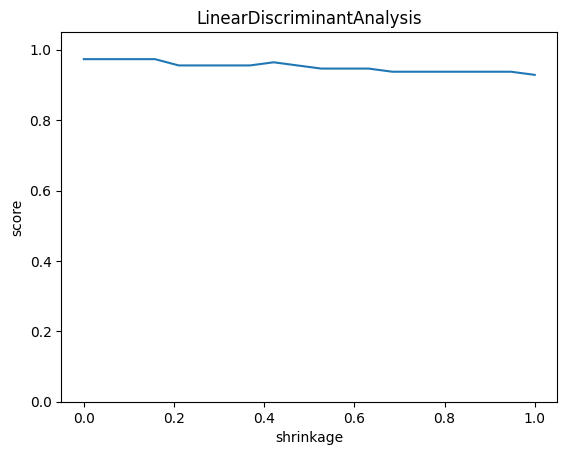

In [12]:
def test_LinearDiscriminantAnalysis_shrinkage(*data):
    X_train, X_test, y_train, y_test = data
    shrinkages = np.linspace(0.0, 1.0, num=20)
    scores = []
    for shrinkage in shrinkages:
        lda = discriminant_analysis.LinearDiscriminantAnalysis(
            solver="lsqr", shrinkage=shrinkage
        )
        lda.fit(X_train, y_train)
        scores.append(lda.score(X_train, y_train))
    # 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(shrinkages, scores)
    ax.set_xlabel(r"shrinkage")
    ax.set_ylabel(r"score")
    ax.set_ylim(0, 1.05)
    ax.set_title("LinearDiscriminantAnalysis")
    plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)
test_LinearDiscriminantAnalysis_shrinkage(X_train, X_test, y_train, y_test)

## MDS多维缩放降维

原理是保持新空间与旧空间之间的距离，同时保持原有数据集的相似性。

sklearn库中可以提供参数`dissimilarity = precomputed`，表示使用者来提供距离矩阵，而不是使用默认的欧氏距离。

假设设有 $ n $ 个数据点，MDS 的目标是找到一个低维坐标系 $ Y = [y_1, y_2, \dots, y_n] $，使得在这个低维空间中，数据点之间的距离 $ d_{ij} $ 尽可能接近原始高维空间中的距离 $ D_{ij} $。MDS 优化的目标是：

$$
\underset{Y}{\mathrm{min}} \sum_{i<j} (d_{ij} - D_{ij})^2
$$

其中：
- $ d_{ij} $ 是低维空间中点 $ y_i $ 和 $ y_j $ 之间的距离
- $ D_{ij} $ 是高维空间中点 $ x_i $ 和 $ x_j $ 之间的距离

stress(n_components=4) : 12.107879080655163
stress(n_components=3) : 12.92795986199502
stress(n_components=2) : 221.1680632036868
stress(n_components=1) : 23162.702457650194


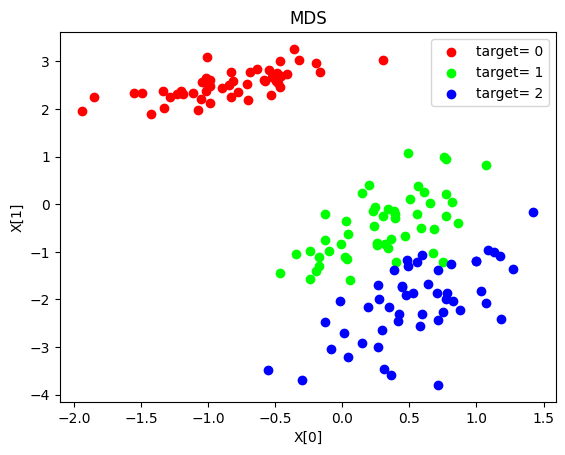

In [13]:
from sklearn import manifold


def test_MDS(*data):
    X, y = data
    for n in [4, 3, 2, 1]:  # 依次考察降维目标为 4维、3维、2维、1维
        mds = manifold.MDS(n_components=n)
        mds.fit(X)
        print("stress(n_components=%d) : %s" % (n, str(mds.stress_)))


def plot_MDS(*data):
    X, y = data
    mds = manifold.MDS(n_components=2)
    X_r = mds.fit_transform(X)  # 原始数据集转换到二维

    ### 绘制二维图形
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = (
        (1, 0, 0),
        (0, 1, 0),
        (0, 0, 1),
        (0.5, 0.5, 0),
        (0, 0.5, 0.5),
        (0.5, 0, 0.5),
        (0.4, 0.6, 0),
        (0.6, 0.4, 0),
        (0, 0.6, 0.4),
        (0.5, 0.3, 0.2),
    )  # 颜色集合，不同标记的样本染不同的颜色
    for label, color in zip(np.unique(y), colors):
        position = y == label
        ax.scatter(
            X_r[position, 0], X_r[position, 1], label="target= %d" % label, color=color
        )

    ax.set_xlabel("X[0]")
    ax.set_ylabel("X[1]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()


test_MDS(X, y) 
plot_MDS(X, y) 

## Isomap流形学习

等距映射的缩写，寻求一个较低维度的嵌入，并保持所有点之间的测量距离（MDS的扩展）-对距离的算法有了优化

- **构建邻接图**：
   - 首先，确定每个数据点的邻居。可以通过固定的距离阈值或者指定最近的k个邻居来定义邻居关系。
   - 生成一个加权无向图，数据点作为图中的节点，如果两个点是邻居，则在它们之间创建边，边的权重为这两个点之间的欧氏距离。

- **计算最短路径**：
   - 使用最短路径算法（如Dijkstra算法或Floyd-Warshall算法），计算图中所有点对之间的最短路径距离。这些最短路径距离可以看作是高维空间中数据点之间的近似“流形距离”。

- **应用多维尺度分析（MDS）**：
   - 将所得的最短路径距离矩阵作为输入，进行经典的MDS分析，将数据嵌入到低维空间中。在MDS步骤中，通过特征值分解，将距离矩阵转换为嵌入坐标，以尽可能保留数据点之间的距离关系。


d:\Code\Github\AI_Learn\.venv\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Code\Github\AI_Learn\.venv\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\Code\Github\AI_Learn\.venv\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\Code\Github\AI_Learn\.venv\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
d

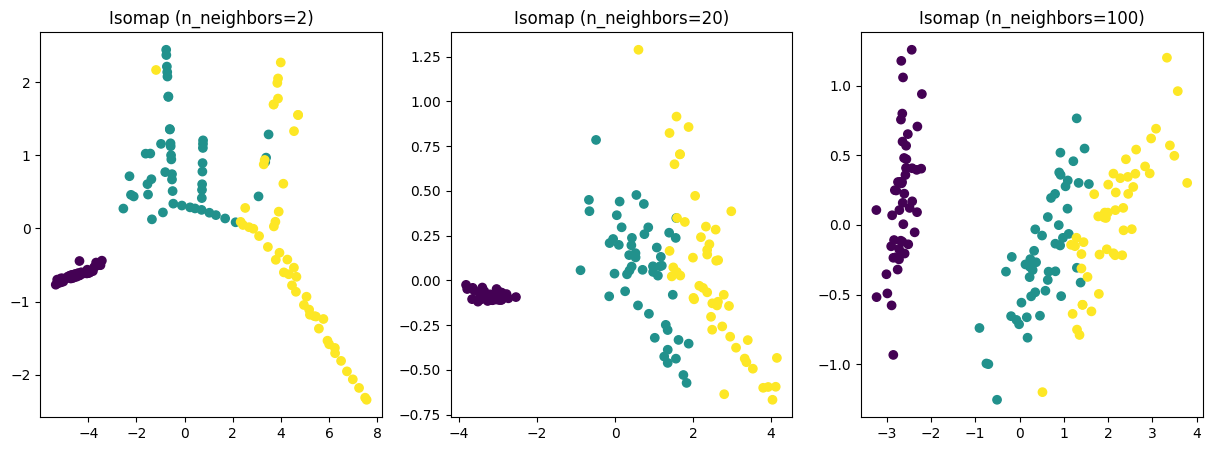

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap

iris = datasets.load_iris()
X = iris.data
y = iris.target
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for idx, neighbor in enumerate([2, 20, 100]):
    isomap = Isomap(n_components=2, n_neighbors=neighbor)
    new_X_isomap = isomap.fit_transform(X)

    ax[idx].scatter(new_X_isomap[:, 0], new_X_isomap[:, 1], c=y)
    ax[idx].set_title("Isomap (n_neighbors=%d)" % neighbor)
plt.show()